In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


In [2]:
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize': (18, 10)})


# Prepare Data

Source of the [dataset](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset)


In [3]:
data = pd.read_csv("stroke-data.csv")
data.head(5)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Report outline

This section provide links to all answer to the requirements of this final project

- Descriptive statistic section

  - [The overview of this dataset](#overview) This section I want to take a look on the overall statistic of this dataset and find some insights.

  - [Gender descriptive statistic](#gender-variable) This section I take a look on gender data

  - [Age descriptive statistic](#age-variable): This section I take a look on the age data

  - [Hypertension descriptive statistic](#hypertension-variable): This section I take a look on the hypertension data

  - [BMI descriptive statistic](#bmi-variable): This section I take a look on the BMI data

- Hypothesis testing

  - [Gender hypothesis testing](#hypothesis-testing-on-gender-variable)

  - [Age hypothesis testing](#hypothesis-for-age-data)

  - [Hypertension hypothesis testing](#hypothesis-testing-on-hypertension)

  - [BMI hypothesis testing](#hypothesis-testing-on-bmi)

- Regression

  - [Logistic Regression](#classification)


# Overview


In [4]:
data.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Look at the statistic, I have some insights.

- First of all, this dataset purpose is mainly focus on training a model to recognize the if some one has the `stroke`. Look at the stroke statistic, it is categorical, indicate whether some has stroke (`1`) or not (`0`). It's mean is about 0.048~0.05, means that 5 out of 100 people will have the stroke. This is not great, as I expect the dataset to be more balance, at least on the dependent variable. However, it may also reflect the reality that not so much people have stroke, or our data will try to rule out the `has stroke` as much as possible, mean that the data has the direction of `prevent the false negative` strategy, as more data has no stroke, the regression may prefer the no-stroke outcome.

  - This is just my personal opinion, because, as far as I know, medical statistic often prefer the `false negative` outcome, which may clash with the above argument

  - It still notable that, all of this imbalance may just caused by the reality that, stroke is not that common.

  - However, [a research about stroke](https://www.world-stroke.org/world-stroke-day-campaign/why-stroke-matters/learn-about-stroke) show that stroke is common than we think.

    > "Globally 1 in 4 adults over the age of 25 will have a stroke in their lifetime. 13.7 million people worldwide will have their first stroke this year and five and a half million will die as a result"

  - The statistic from world-stroke told us that, about 25% of world population that over the age of 25 will have a stroke in their lifetime. Therefore, I have to question about the integrity of the dataset. The true source of data is not revealed due to `confidential sensitive data` [problem](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset/discussion/237113)

  - In this [discussion](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset/discussion/222322) about the source of the dataset, the author state that

    > "In addition, because the source of the dataset is private, you should only use this dataset for educational purposes, not for research or economical purposes."

  - Therefore, I still keep this dataset, because my purpose is educational. However, I will still check on any _weird_ stuff that against other's statistic over the internet

  - Some research paper cite this dataset suggest that it collected from Bangladesh. [This paper](https://www.karger.com/Article/FullText/517234) reveal that, just about 1-2% of the population is relevance to stroke, which is close to our dataset. This confirm that, there are some region of the world has a totally different statistic from the world, so I will keep my mind around this when conduct any external research and compare to this dataset's statistic.

- `BMI` and `avg_glucose_level` are both advanced indicator, which I should carefully research more about.

- `age` is fairly spread out from the mean, with the `std` about 22.6, the age coverage is very large. The minimum `age` they survey on is 0.08, which confuse me a lot. Who really operate a stroke survey on children? I will need further research about this problem.


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
data.set_index('id', inplace=True)


<AxesSubplot:ylabel='id'>

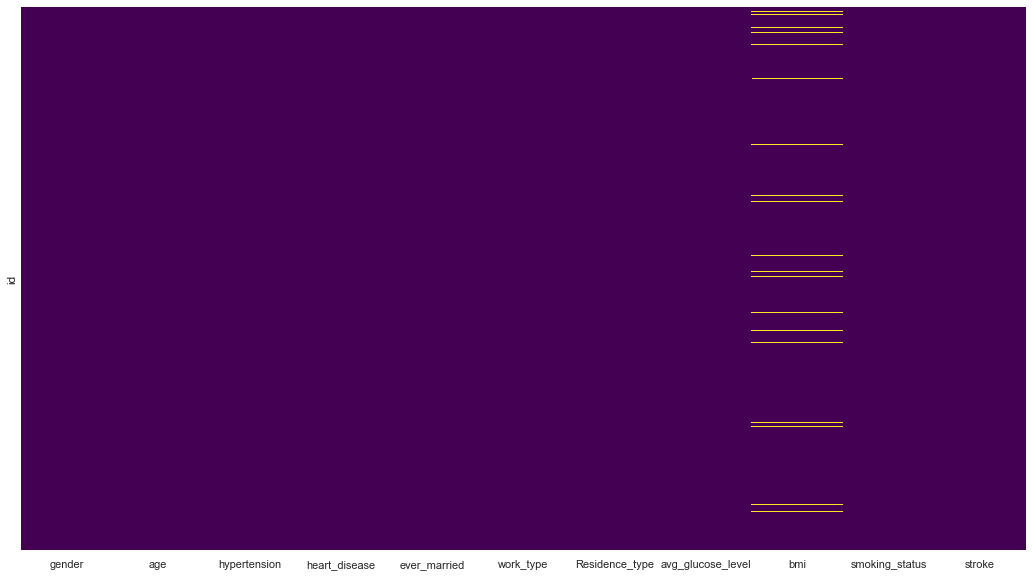

In [7]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')


It notable that there are some missing data in the BMI variable. I gonna fix that.


# Handle missing data


As you can see in the heatmap, there are missing data in `BMI` variable. There are several methods, to fix that, includes

- Drop any missing value

- Fill the missing value with value that won't affect the statistic

This time, I gonna fill the value with the `mean` of data. This imputation method won't affect the mean of `BMI`, but will make the spread (the `std`) smaller.


<AxesSubplot:ylabel='id'>

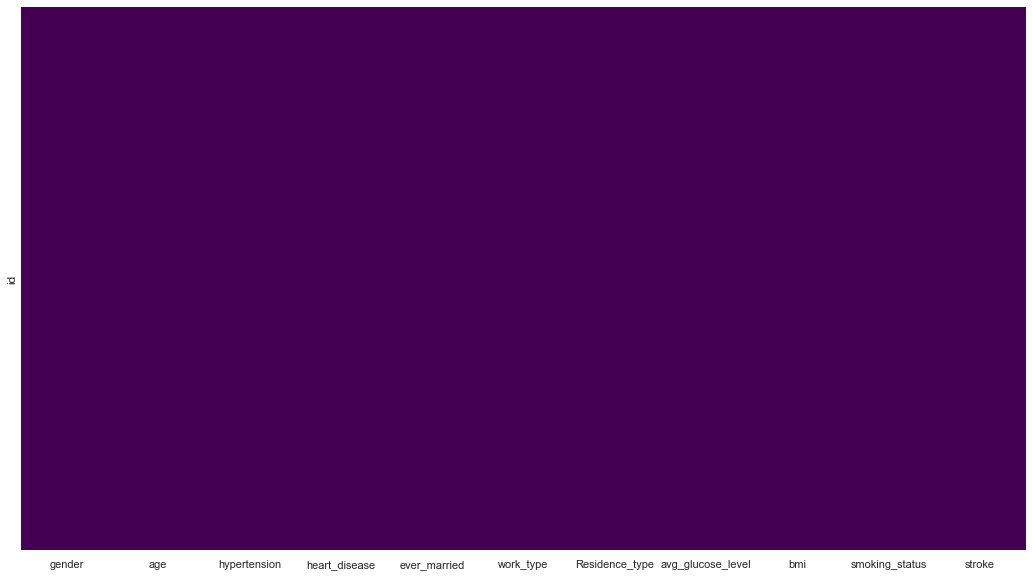

In [8]:
bmiReplaceMean = data[data["bmi"].notna()].bmi.mean()
data.bmi = data.bmi.fillna(bmiReplaceMean)
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')


In [9]:
data.describe()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
data


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0


# Descriptive Statistic and Hypothesis testing


## Gender variable


### Descriptive


<AxesSubplot:xlabel='gender', ylabel='count'>

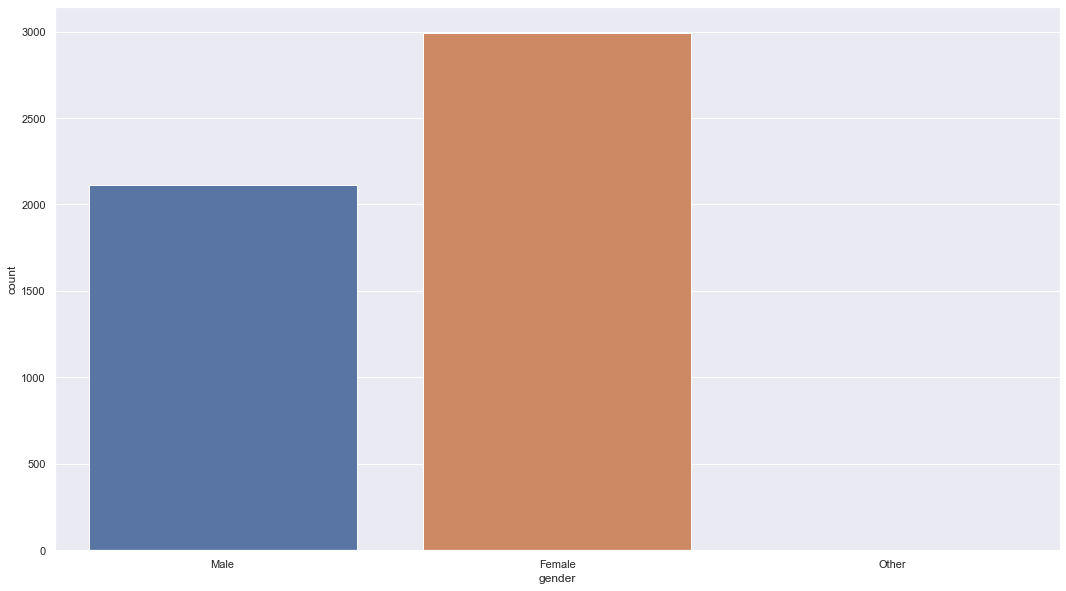

In [11]:
# Gender analysis
sns.countplot(data=data, x="gender")


As you can see on the plot above, the gender data is skewed toward the female. This feature of the data make it imbalance, where the gender of the population often near 1:1. It notably that we also encounter "Other" gender. In my opinion, stroke can be happen with anyone don't follow a healthy schedule for live. Therefore, there "Other" gender here won't cause any significant problem for our analysis.


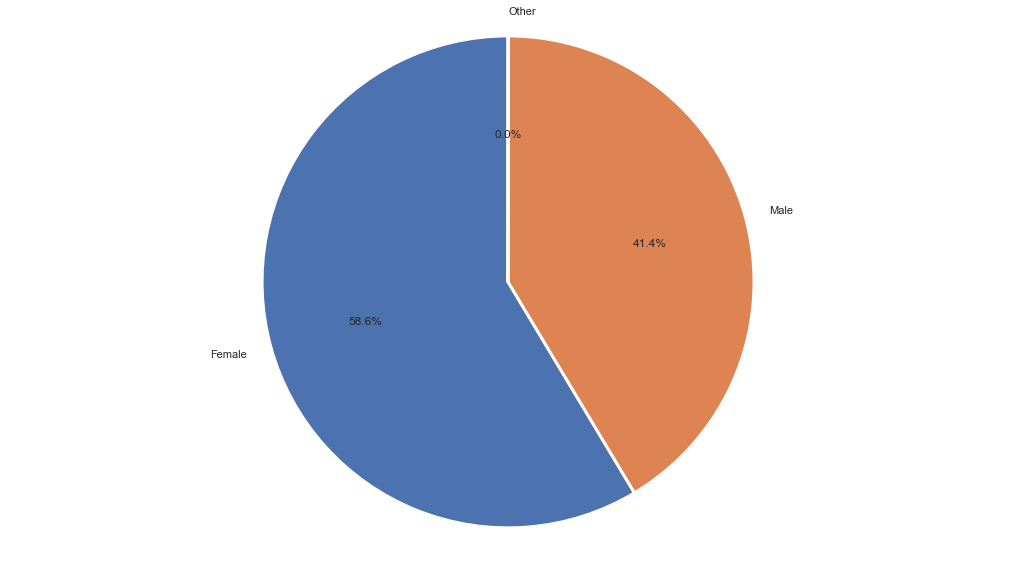

In [12]:
# display(sns.countplot(data=data, x='gender', hue="stroke"))

genderCountDict = data.gender.value_counts().to_dict()
genderLabel = []
genderCount = []
for x, y in genderCountDict.items():
    genderLabel.append(x)
    genderCount.append(y)

plt.pie(genderCount, labels=genderLabel, wedgeprops={
        'linewidth': 3, 'edgecolor': 'white'}, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()


I plot a pie diagram of gender counting data, group by the stroke. The imbalance make us hard to tell whether the stroke occurs more on male or female. "Other" field has so little data that we can not inference anything. Maybe I should try another approach


Female    2994
Male      2115
Other        1
Name: gender, dtype: int64 

Female    141
Male      108
Name: gender, dtype: int64 

Percent stroke in female:  0.047094188376753505
Percent stroke in male:  0.05106382978723404


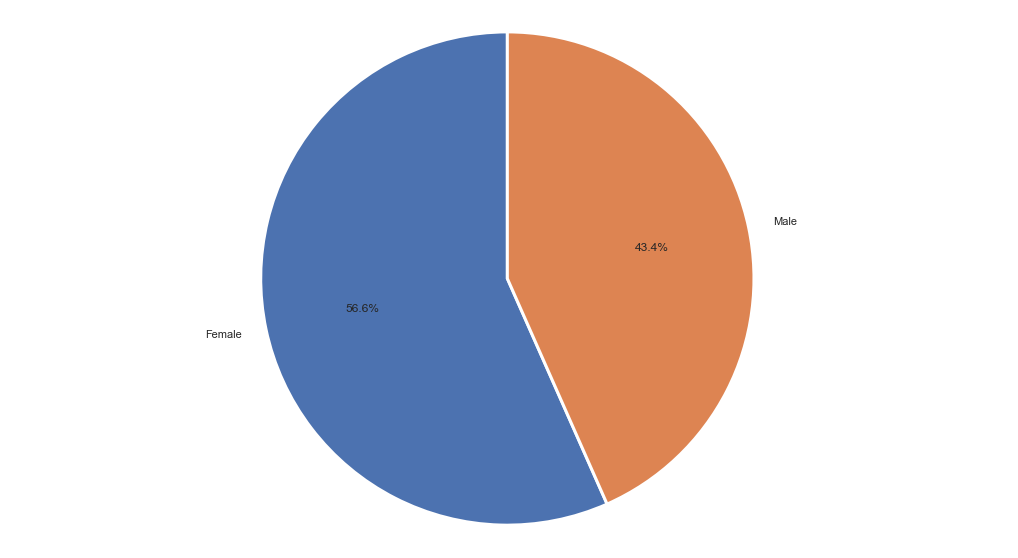

In [13]:
totalGender = data.gender.value_counts()
strokeGender = data[data.stroke == 1].gender.value_counts()
print(totalGender, "\n")
print(strokeGender, "\n")
print("Percent stroke in female: ", strokeGender.Female/totalGender.Female)
print("Percent stroke in male: ", strokeGender.Male/totalGender.Male)

genderCountDict = data.gender[data.stroke == 1].value_counts().to_dict()
genderLabel = []
genderCount = []
for x, y in genderCountDict.items():
    genderLabel.append(x)
    genderCount.append(y)

plt.pie(genderCount, labels=genderLabel, wedgeprops={
        'linewidth': 3, 'edgecolor': 'white'}, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()


The percentage of men and of women who have stroke is near each other, therefore, I assume that the gender won't significantly affect the probability of stroke. It notable that "Other" gender have no stroke. This should be caused by the lack of data, as there are only 1 such person. I will remove this variable later as it won't cause any effect on the analysis.

One problem that I can not solve right now is the imbalance of the dataset make the inference wrong. I want to down-sampling the dataset to make 2 gender is equal in term of counting.


Female    2115
Male      2115
Name: gender, dtype: int64 

Male      108
Female     98
Name: gender, dtype: int64 

Percent stroke in female after resample:  0.046335697399527184
Percent stroke in male after resample (which is not change, as we did not resample this) :  0.05106382978723404


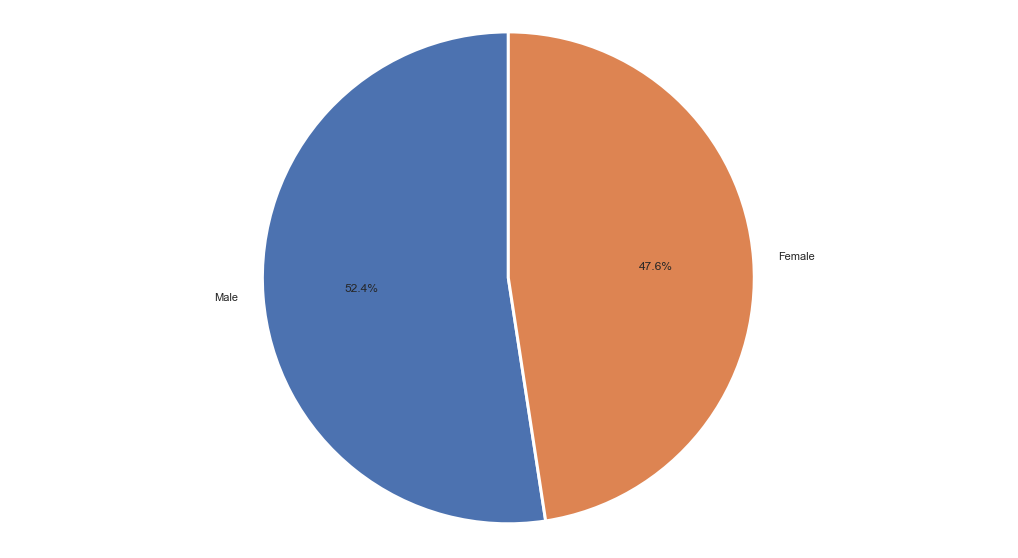

Estimate the women that has stroke after random resampling:  99.13


In [14]:
# Downsampling the Female data
# by random select the Female with equal number of original
# Male from the dataset
resampleFemaleData = data[data.gender == "Female"].sample(
    n=2115, random_state=10)[["gender", "stroke"]]
originalMaleData = data[data.gender == "Male"][["gender", "stroke"]]

resampleData = resampleFemaleData.append(originalMaleData)

totalGender = resampleData.gender.value_counts()
strokeGender = resampleData[resampleData.stroke == 1].gender.value_counts()
print(totalGender, "\n")
print(strokeGender, "\n")
print("Percent stroke in female after resample: ",
      strokeGender.Female/totalGender.Female)
print("Percent stroke in male after resample (which is not change, as we did not resample this) : ",
      strokeGender.Male/totalGender.Male)

genderCountDict = resampleData.gender[resampleData.stroke == 1].value_counts(
).to_dict()
genderLabel = []
genderCount = []
for x, y in genderCountDict.items():
    genderLabel.append(x)
    genderCount.append(y)

plt.pie(genderCount, labels=genderLabel, wedgeprops={
        'linewidth': 3, 'edgecolor': 'white'}, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

# Resampling multiple time to find the estimated stroke women
estimatedStrokeFemale = 0
for i in range(100):
    resampleFemaleData = data[data.gender == "Female"].sample(
        n=2115, random_state=i)[["gender", "stroke"]]
    estimatedStrokeFemale += len(
        resampleFemaleData[resampleFemaleData.stroke == 1])

print("Estimate the women that has stroke after random resampling: ",
      estimatedStrokeFemale/100)


After resampling the dataset, it surprised that, with the same size in each gender, the Male is slightly more likely to have stroke. This show that imbalance in the dataset is dangerous and can make our investigation go in the wrong way.


<a id='hypothesisGender'></a>


### Hypothesis testing on gender variable


As what I mentioned earlier, gender variable is skewed toward Female make it hard for us to inference, but that is just my opinion. Let conduct a hypothesis on this problem.

Recap about the proportion of sample:

- Female 2994 -> 43.4%

- Male 2115 -> 56.6%

If we rule out the "Others", p_female + p_male = 0

The hypothesis:

- Null Hypothesis `H0`: The p_female = p_male => p_female = 50% = 0.5

- Alternative `Ha`: the p_female > p_male => p_female > 0.5

Let summary what we are given:

- $f_{female} = 0.566$

- $p_{hypothesis} = 0.5$

- $n = 2994 + 2115 = 5109$

Therefore, using pivot statistic for f:

$$T = \frac{f-p}{\sqrt{\frac{p(1-p)}{n}}} = 5.447 $$

The test statistic for f is 5.447, which is so high that if I use `R` with `pnorm` function to convert the critical value to probability, it will actually = 1, and the `p-value` will reach ~0. Therefore, in any significant level, we reject the null hypothesis that p_female equal to 0.5 and accept the alternative hypothesis

In conclusion, we accept the the given dataset has more women than men with basically any significant.


<a id='age_d'></a>


## Age variable


### Descriptive statistic

In this section, I'm going to use [KDE](https://en.wikipedia.org/wiki/Kernel_density_estimation) (Kernel density estimation), as a method to estimate the continuous PDF function from given discrete data like the age variable.


count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64


<AxesSubplot:xlabel='age', ylabel='Count'>

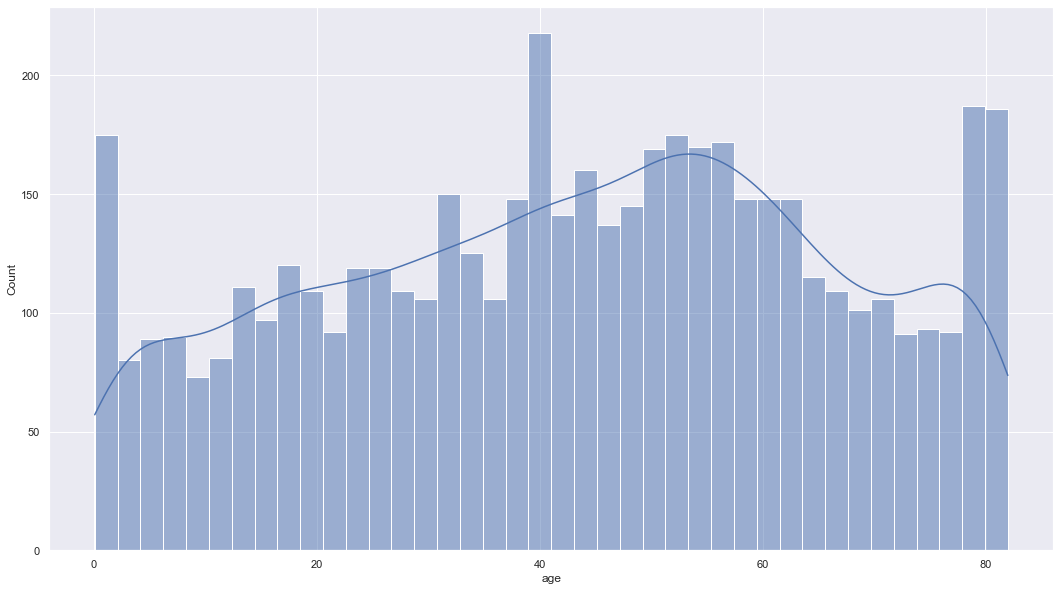

In [15]:
# Age statistic
print(data.age.describe())
sns.histplot(data=data, x="age", bins=40, kde=True)

# Line plot between age and stroke variable
# sns.lineplot(data=data, x="age", y="stroke")


It weird to have a lot of people who get invited to this stroke-survey with age of an infant. It not clear, but it think the age is focus on the middle and elder group (> 40). We need to make some overall counting to see how the age data distributed.


In [16]:
print("Smaller than 10: ", data[data.age <= 10].age.count())
# Weird? 507 children was asked about the stroke problem ???

data[data.age <= 10].stroke.value_counts()
# There are 1 stroke in 507 children


Smaller than 10:  507


0    506
1      1
Name: stroke, dtype: int64

So, there are 507 children in this survey, and there are 1 child has the stroke. This is rare. [A research found on google](https://www.betterhealth.vic.gov.au/health/conditionsandtreatments/stroke-can-occur-in-children) told that 2 stroke found per 100,000 children. The reason is unknown. So we can safely assume that, is really uncommon to have stroke in children. Let keep explore the age feature.


<AxesSubplot:xlabel='age', ylabel='Count'>

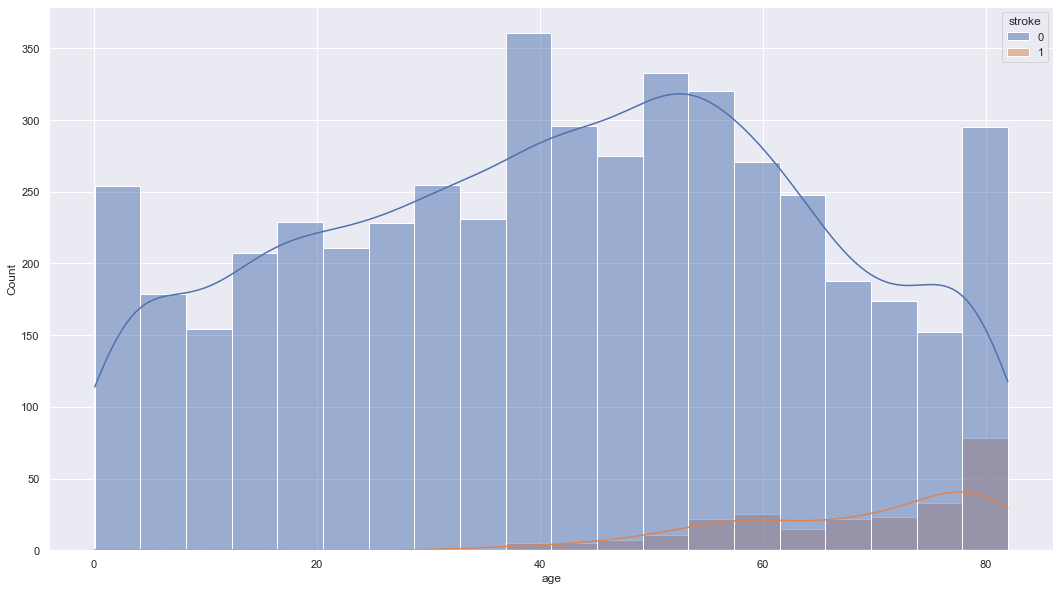

In [17]:
# switch to
sns.histplot(data=data, x="age", hue="stroke", kde=True)


<AxesSubplot:xlabel='age', ylabel='Count'>

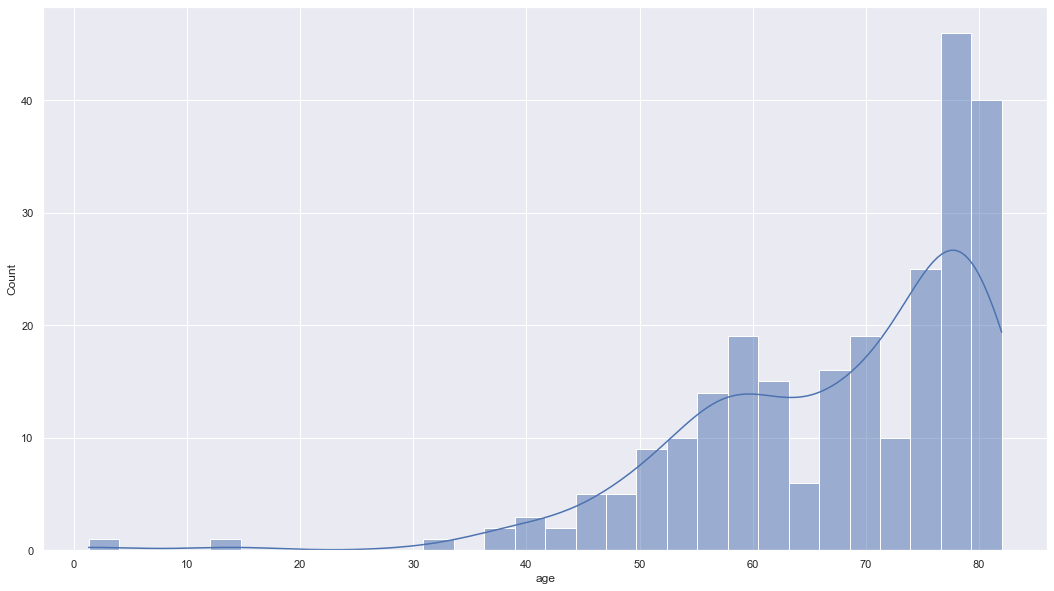

In [18]:
# Distribution of stroke on
sns.histplot(data=data[data.stroke == 1], x="age", kde=True, bins=30)


As we can see, most of the survey result in a non-stroke. Stroke, base on age group is setting up with 2 maxima. In my opinion, there were 2 normal distribution or normal-alike distribution compose this phenomenal. This maybe weird, logically we think that the older the person, the likely to have some kind of disease him/her is. But in this situation, stroke person setup a local maxima at age ~58, and then rocket up to the global maxima at nearly age ~78. One comment on this problem is that, the collected data is imbalance, as showed in the previous inference. I will plot it again for easier observation.


<AxesSubplot:xlabel='age', ylabel='Count'>

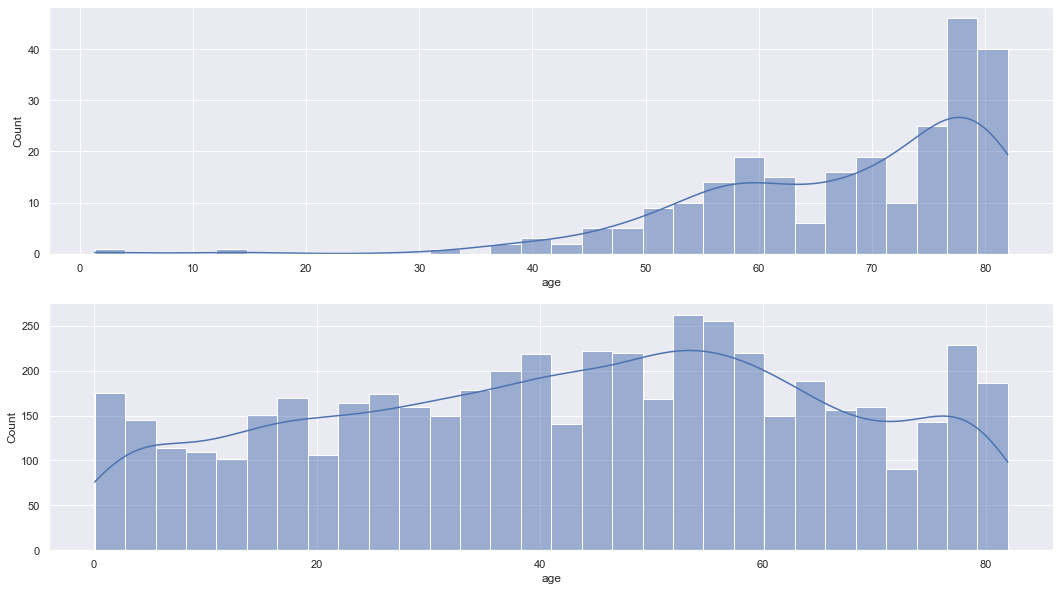

In [19]:
f, (ax1, ax2) = plt.subplots(2)
sns.histplot(data=data[data.stroke == 1], x="age", kde=True, bins=30, ax=ax1)
sns.histplot(data=data, x="age", bins=30, kde=True, ax=ax2)


The age group around 50~60 is actually the leading age group in the dataset. In the other hand, age group of 70~80 is pretty smaller. This is make sense by now. As the age group of 70~80, while the data is lower, that age group still has the exponentially chance to have stroke, in compare to smaller age. The second maxima in age 58 in the stroke version is due to imbalance of the dataset.


### Hypothesis for age data

My hypothesis for age data is that, if the mean of age is around 44, or not. Summary of the hypothesis

- Null hypothesis Ho: mean = 44

- Alternative hypothesis Ha: mean != 44

Given that:

- $\bar{X} = 43.226$

- $\mu = 44$

- $S_x = 22.612$

- $n = 5109$

Test statistic:

$$ T = \frac{\bar{X} - \mu}{\frac{S_x}{\sqrt{n}}} = -2.34 $$

Convert the test statistic T to probability, we have:

- One-tailed probability (right tail): 0.99033856

- One-tailed probability (left tail): 0.00966144

- Two-tailed probability: 0.01932287

As our alternative hypothesis indicate that the 2-tailed is used, therefore, the p-value is 0.019, which often lower than smallest popular significant level like 0.05. This mean that, our alternative hypothesis will be accepted in most case.

In conclusion: The mean of age is different from 44.


## Hypertension variable


### Descriptive Statistic


In [20]:
data.hypertension.describe()


count    5110.000000
mean        0.097456
std         0.296607
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: hypertension, dtype: float64

Look at the above statistic. It notable that, the mean is about 0.09 in this 0 and 1 dataset. This show that most of the sample is not hypertension, or, 9 out of 100 person will have the hypertension.

Hypertension is a disease. I want to establish a connection between hypertension with other variable to see if, it depend on other variable or not, as hypertension is highly link to age, avg glucose level.


<AxesSubplot:xlabel='age', ylabel='Count'>

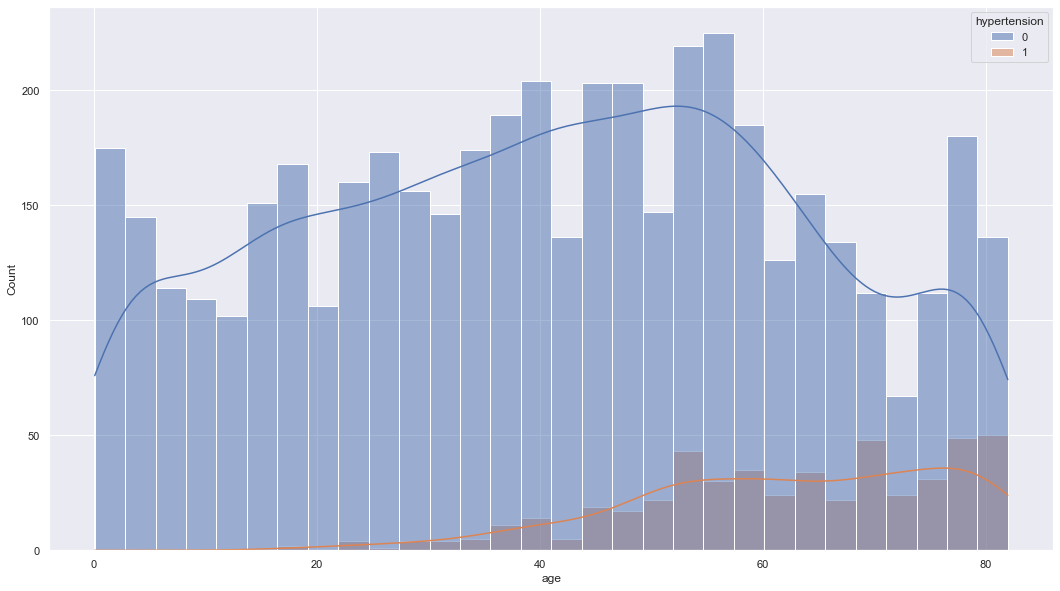

In [21]:
sns.histplot(data=data, x="age", hue="hypertension", kde=True, bins=30)


The above figure verify my hypothesis about the age affect the likelihood, in a bad way, to hypertension. Let's see if hypertension has some relation with stroke? Compute the correlation between hypertension and stroke using the Pearson method (PCC):


In [22]:
data.stroke.corr(data.hypertension)


0.12790382346648044

The correlation is lower than my expectation. It around 0.127, which is low and near 0, mean that there is a weak positive correlation between stroke and hypertension. As it against my common sense, [I does a small research into hypertension](https://www.who.int/news-room/fact-sheets/detail/hypertension). Hypertension, as a disease, and it's caused by many factor. It can be caused by:

- Modifiable risk factors include unhealthy diets (excessive salt consumption, a diet high in saturated fat and trans fats, low intake of fruits and vegetables), physical inactivity, consumption of tobacco and alcohol, and being overweight or obese.

- Non-modifiable risk factors include a family history of hypertension, age over 65 years and co-existing diseases such as diabetes or kidney disease.

By definition, a stroke (also a disease) occurs when a blood vessel that carries oxygen and nutrients to the brain is either blocked by a clot or bursts (or ruptures). When that happens, part of the brain cannot get the blood (and oxygen) it needs, so it and brain cells die.

Hypertension, which is a really basic disease and can be caused by a lot of factor, while stroke has strict procedure to be happen. As hypertension still a main risk factor for stroke, we can see that correlation of 0.127 show that, anyone has hypertension, can have stroke. But hypertension is just too broad, and it can be risk factor for heart disease, rental disease (relate to kidney) and to stroke, as well.

This may explain the weak link between hypertension and stroke. But I want to gain more insight. Let make a confusion-matrix-like for, with 2 rows (non-stroke stroke) and 2 cols (non-hyper and hyper)


In [23]:
# Definition of the matrix
#               none-stroke  stroke
# non-hyper
# hyper

confusionMatrix = [[0, 0], [0, 0]]


def confusionMapping(x):
    confusionMatrix[x.hypertension][x.stroke] += 1
    return x


data[["hypertension", "stroke"]].apply(lambda x: confusionMapping(x), axis=1)

# print(confusionMatrix)
confusionDf = pd.DataFrame(confusionMatrix, index=[
                           "non-hyper", "hyper"], columns=["non-stroke", "stroke"])
display(confusionDf)

print("Percent of who is stroke, given that they are hypertension: ",
      confusionMatrix[1][1]/(confusionMatrix[1][1] + confusionMatrix[1][0]))


,non-stroke,stroke
non-hyper,4429,183
hyper,432,66


Percent of who is stroke, given that they are hypertension:  0.13253012048192772


The result is pretty similar to the correlation when I extract the conditional probability where given a hypertension sample, there are about 13% of the sample will have the stroke.

This hypertension also suffer from imbalance problem that I think I should bring it on and fix to gain more accurately result.


In [24]:
data.hypertension.value_counts()


0    4612
1     498
Name: hypertension, dtype: int64

In [25]:
# Apply the downsampling method

nonHyperResample = data[data.hypertension == 0].sample(
    n=498)[["hypertension", "stroke"]]
hyperResample = data[data.hypertension == 1][["hypertension", "stroke"]]
hypertensionResample = nonHyperResample.append(hyperResample)
hypertensionResample.describe()

confusionMatrix = [[0, 0], [0, 0]]


def confusionMapping(x):
    confusionMatrix[x.hypertension][x.stroke] += 1
    return x


hypertensionResample[["hypertension", "stroke"]].apply(
    lambda x: confusionMapping(x), axis=1)

confusionDf = pd.DataFrame(confusionMatrix, index=[
                           "non-hyper", "hyper"], columns=["non-stroke", "stroke"])
display(confusionDf)

print("Percent of who is stroke, given that they are hypertension: ",
      confusionMatrix[1][1]/(confusionMatrix[1][1] + confusionMatrix[1][0]))


,non-stroke,stroke
non-hyper,485,13
hyper,432,66


Percent of who is stroke, given that they are hypertension:  0.13253012048192772


When the data is balance, we can infer more easily. It easy to say that, hypertension does affect the likelihood of a present of stroke. This also confirm that, hypertension not really the only cause to stroke, as when patient with no present of hypertension, there is still be around 2% chance of having stroke.


### Hypothesis testing on hypertension

With hypertension variable, I want to test that if the frequency of someone has the stroke is reaching (a lower approach) 10% or not. The hypothesis is:

- Null hypothesis H0: f = p = 10%

- Alternative hypothesis Ha: f < p = 10%

Given that

- $f = 0.097$

- $p = 0.1 $

- $n = 5109 $

Test statistic is:

$$T = \frac{f-p}{\sqrt{\frac{p(1-p)}{n}}} \simeq -0.0001  $$

The test statistic is approach 0, which indicate that, the p-value of this test will be about 0.5, which is very high and will beat (greater than) every popular significant level. This indicate that, we will accept Ho that, the frequency of someone has stroke is about 10%.


## BMI variable


### Descriptive Statistic


count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

<AxesSubplot:xlabel='bmi', ylabel='Count'>

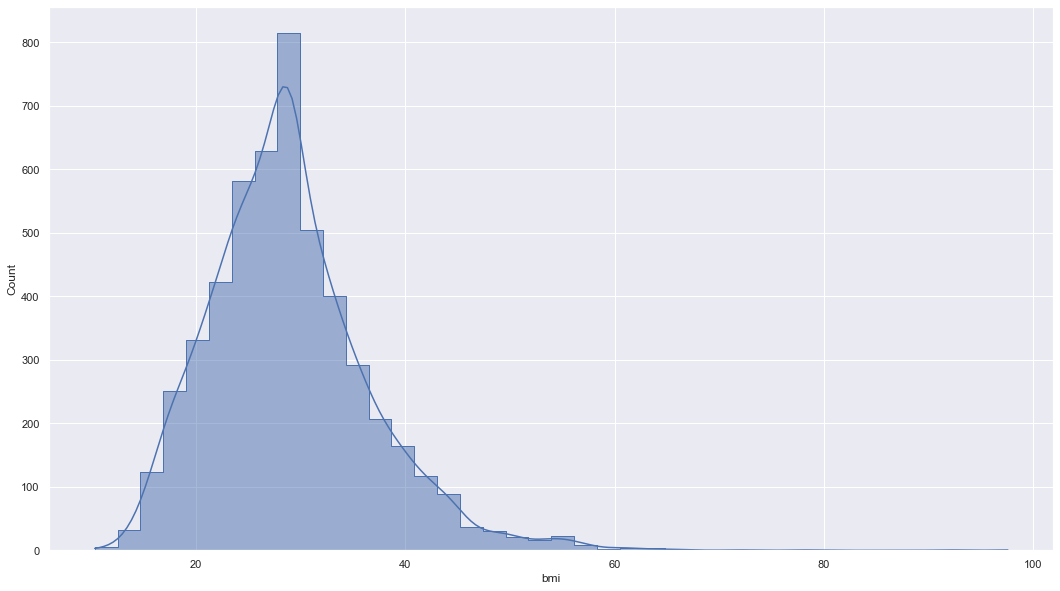

In [26]:
display(data.bmi.describe())

sns.histplot(data, x="bmi", kde=True, bins=40, element="step")


Using histogram with KDE curve, we can see the estimated distribution of the BMI.

First of all, let talk about BMI. What is BMI? [Body mass index (BMI)](https://en.wikipedia.org/wiki/Body_mass_index) is an indicator compute from height and weight of an (often an adult) person to measure his/her nutrition status,.

Children can be measured with BMI, but the it won't be accurately. Children BMI often computed and then compared to others to define the nutrition status:

> "After BMI is calculated for children and teens, it is expressed as a percentile obtained from either a graph or a percentile calculator linked below. These percentiles express a child’s BMI relative to US children who participated in national surveys from 1963-65 to 1988-944. Weight and height change during growth and development, as does their relation to body fatness. Consequently, a child’s BMI must be interpreted relative to other children of the same sex and age." - [by USA's CDC (Center of Disease Control and Prevention)](https://www.cdc.gov/healthyweight/assessing/bmi/childrens_bmi/about_childrens_bmi.html)

This process is complicated, so I will leave them out of this report.

In the [overview](#overview), I does make a statement that this data is surveyed in Bangladesh, therefore, I find the [BMI classification table for Bangladesh](https://dietcounselingcentre.com/bmi-calculator-for-bangladesh/).

| BMI          | Nutrition status           |
| ------------ | -------------------------- |
| <18.5        | Under weight               |
| 18.5 – 24.99 | Normal                     |
| 25.0 – 29.99 | Over weight                |
| 30.0 – 34.99 | Obesity Grade I            |
| 35.0 – 39.99 | Obesity Grade II           |
| 40 and above | Obesity Grade III (Danger) |
| Above 40     | Obesity class III          |

The above statistic show us that the mean BMI is 28.98, which fall into Over weight. The proportion of someone who is normal or under weight is low, so in overall, this population lifestyle is not very healthy, but the stroke proportion is still low. It is possible that, BMI is not correlated with stroke. But in my opinion, bad nutrition always lead to bad thing. Let investigate further.


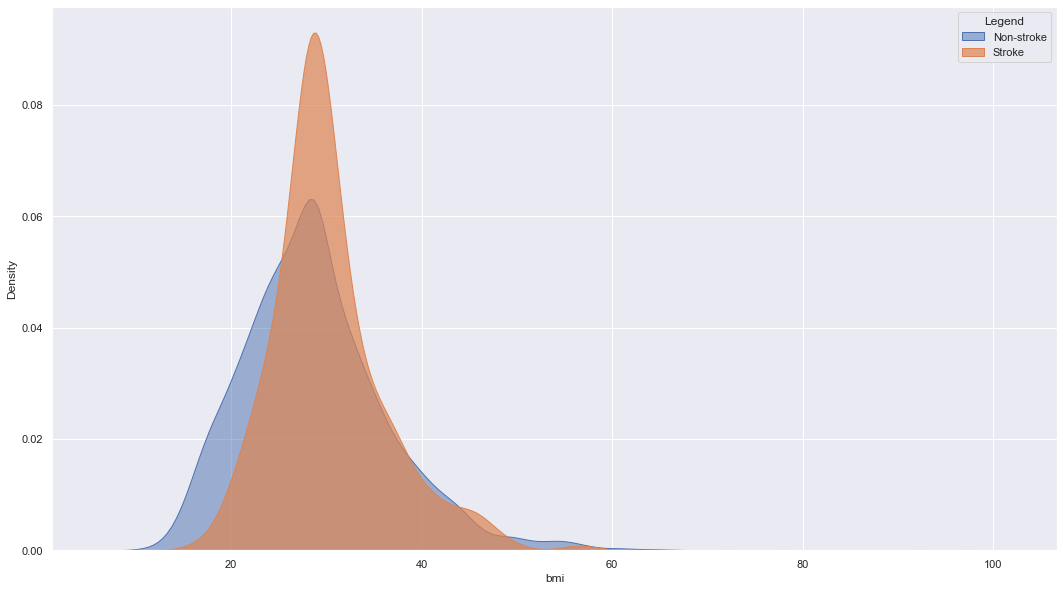

In [27]:
f, ax1 = plt.subplots(1)
sns.kdeplot(data=data[data.stroke == 0], x="bmi", ax=ax1, shade=True, alpha=0.5)
sns.kdeplot(data=data[data.stroke == 1], x="bmi", ax=ax1, shade=True, alpha=0.7)
ax1.legend(title="Legend", labels=["Non-stroke", "Stroke"])


The above plot is an estimated PDF of BMI distribution, with group by `stroke` variable. As you can see, the distribution of stroke patients shift toward the right, indicate that higher BMI is responsible to cause stroke. However, it unclear that why about over 30, the 2 plot is pretty similar. I have a hypothesis that, maybe past a certain point, like 30, the person status changed to `Obesity`. This make the patient is subject to a broad amount of diseases, not only `stroke`, and maybe there are some disease that kill the patient even before they have a chance to develop the stroke.

But in conclusion, I can still said that, when in `overweight` class, you will have a higher chance to have a `stroke`.


### Hypothesis testing on bmi


In this section, I want to test the mean of BMI, if past the normal point (greater than 25). The hypothesis is:

- Null hypothesis H0: mean = 25

- Alternative hypothesis Ha: mean >= 25

Given that:

- $\bar{X} = 28.89$

- $\mu = 25$

- $S_x = 7.69$

- $n = 5109$

Test statistic:

$$ T = \frac{\bar{X} - \mu}{\frac{S_x}{\sqrt{n}}} = 36.15 $$

Convert the test statistic T to probability, we have:

- One-tailed probability (right tail): ~0.0

- One-tailed probability (left tail): ~1.0

- Two-tailed probability: ~0.0

As our alternative hypothesis indicate that the 1-tailed is used, therefore, the p-value is ~0, which definitely lower than any popular significant level. This means that, our alternative hypothesis will be accepted in any case.

In conclusion: The mean of BMI is surpass 25, so the population is classified as `Overweight`, or more accurately, not `Normal` or `Under weight`


# Classification


## Quick overview


As my data use `stroke`, a categorical variable as dependent variable, so I will classified it instead of doing a regression. In this section, I will try to classifies it using independent numerical variable.


In [28]:
# recap the numerical data
data.select_dtypes("float")


,age,avg_glucose_level,bmi
id,,,
9046,67.0,228.69,36.600000
51676,61.0,202.21,28.893237
31112,80.0,105.92,32.500000
60182,49.0,171.23,34.400000
1665,79.0,174.12,24.000000
...,...,...,...
18234,80.0,83.75,28.893237
44873,81.0,125.20,40.000000
19723,35.0,82.99,30.600000


A quick recap: We have 3 numerical variable: `age`, `avg_glucose_level`, `bmi`. I will do [logistic regression](https://en.wikipedia.org/wiki/Logistic_regression), a binary classification model.


In [29]:
classData = data[["age", "avg_glucose_level", "bmi", "stroke"]]
display(classData)


,age,avg_glucose_level,bmi,stroke
id,,,,
9046,67.0,228.69,36.600000,1
51676,61.0,202.21,28.893237,1
31112,80.0,105.92,32.500000,1
60182,49.0,171.23,34.400000,1
1665,79.0,174.12,24.000000,1
...,...,...,...,...
18234,80.0,83.75,28.893237,0
44873,81.0,125.20,40.000000,0
19723,35.0,82.99,30.600000,0


I will try a quick logistic model one 1 dependent variable first


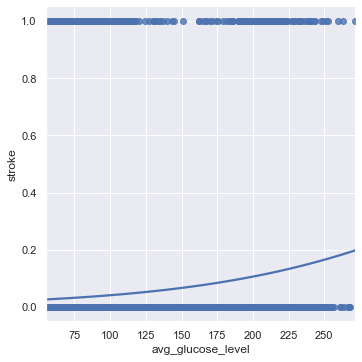

In [30]:
sns.lmplot(data=classData, x="avg_glucose_level",
           y="stroke", logistic=True, ci=None)


The plot from the library is not good. I have to fit model myself and plot it out later.


## Logistic regression


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)


# Split train and test dataset to cross validation later

X = classData[["age", "avg_glucose_level", "bmi"]]
y = classData["stroke"]

print("Statistic of the original data, but cut some variable")
display(classData.describe())
print("=====================================================")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

# logmodel

print("Statistic of the train data")
display(X_train.describe())
display(y_train.describe())
print("=====================================================")


logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

predictions = logmodel.predict(X_test)

print("Prediction of the logistic model, in term of raw probability")
print("Predict classes (stroke): \n", logmodel.classes_)
print("Predict probability: \n", logmodel.predict_proba(X_test)[0:5])
print("Predict log probability: \n", logmodel.predict_log_proba(X_test)[0:5])
print("=====================================================")

display(pd.Series(predictions).value_counts())

print(classification_report(y_test, predictions))


Statistic of the original data, but cut some variable


,age,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,106.147677,28.893237,0.048728
std,22.612647,45.283560,7.698018,0.215320
min,0.080000,55.120000,10.300000,0.000000
25%,25.000000,77.245000,23.800000,0.000000
50%,45.000000,91.885000,28.400000,0.000000
75%,61.000000,114.090000,32.800000,0.000000
max,82.000000,271.740000,97.600000,1.000000


Statistic of the train data


,age,avg_glucose_level,bmi
count,3423.000000,3423.000000,3423.000000
mean,43.255413,105.746827,28.913192
std,22.510558,45.014284,7.695399
min,0.160000,55.120000,12.300000
25%,25.000000,76.710000,23.900000
50%,45.000000,91.650000,28.300000
75%,61.000000,114.125000,32.700000
max,82.000000,271.740000,97.600000


count    3423.000000
mean        0.044698
std         0.206669
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: stroke, dtype: float64

Prediction of the logistic model, in term of raw probability
Predict classes (stroke): 
 [0 1]
Predict probability: 
 [[0.99407817 0.00592183]
 [0.98902222 0.01097778]
 [0.99877424 0.00122576]
 [0.84064659 0.15935341]
 [0.86807888 0.13192112]]
Predict log probability: 
 [[-5.93943454e-03 -5.12910959e+00]
 [-1.10384790e-02 -4.51188218e+00]
 [-1.22650695e-03 -6.70419822e+00]
 [-1.73583929e-01 -1.83663086e+00]
 [-1.41472697e-01 -2.02555108e+00]]


0    1687
dtype: int64

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1591
           1       0.00      0.00      0.00        96

    accuracy                           0.94      1687
   macro avg       0.47      0.50      0.49      1687
weighted avg       0.89      0.94      0.92      1687



In [32]:
intercept = logmodel.intercept_
coef = logmodel.coef_
coef = coef[0]
display(dict({
    "Intercept": intercept[0],
    "Age": coef[0],
    "Average Glucose Level": coef[1],
    "BMI": coef[2]
}))


{'Intercept': -7.5500550090346,
 'Age': 0.07070929847278652,
 'Average Glucose Level': 0.004701255330626309,
 'BMI': -0.0030426004312808564}

Summary the above code:

- I split the data into 2 part: Train and Test. The train is fed into the logistic model to fit the function. Then, after I have the model, I will fed it with `X_test` and let it predict the likelihood of stroke, and give it a label. Then, compare with the original `y_test` and get the comparison statistic.

- In the time I read the result, I see that the model perform a perfect recall and a close to perfect precision, which is unbelievable. Therefore, I place some debugging print on the way it execute to see if there are any problems. And there are some real problems:

  - Copy from the above result (limited by 5):

    > Prediction of the logistic model, in term of raw probability

    > Predict classes (stroke):

    > [0 1]

    > Predict probability:

    > [[0.99407817 0.00592183]

    > [0.98902222 0.01097778]

    > [0.99877424 0.00122576]

    > [0.84064659 0.15935341]

    > [0.86807888 0.13192112]]

    > Predict log probability:

    > [[-5.93943454e-03 -5.12910959e+00]

    > [-1.10384790e-02 -4.51188218e+00]

    > [-1.22650695e-03 -6.70419822e+00]

    > [-1.73583929e-01 -1.83663086e+00]

    > [-1.41472697e-01 -2.02555108e+00]]

  - The above result is the probability of being non-stroke, or stroke, in order, is mostly non-stroke. This is likely caused by the imbalance of the model. Therefore, I will perform a down-sample procedure again and make the stroke to be balance


## Balance the data and redo the regression


In [33]:
# Resample, stroke only occurs for 249
# data[data.stroke == 1]

resampleNonStroke = data[data.stroke == 0].sample(
    n=249, random_state=10)
resampleStroke = resampleNonStroke.append(data[data.stroke == 1])
resampleStroke


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
39202,Female,61.0,1,1,Yes,Private,Urban,237.58,28.893237,formerly smoked,0
58257,Male,9.0,0,0,No,children,Urban,64.20,18.500000,Unknown,0
47735,Female,59.0,0,0,Yes,Private,Rural,224.71,42.900000,never smoked,0
38067,Female,22.0,0,0,No,Private,Urban,139.48,28.600000,formerly smoked,0
24361,Female,38.0,0,0,Yes,Private,Urban,87.94,43.800000,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
17739,Male,57.0,0,0,Yes,Private,Rural,84.96,36.700000,Unknown,1
49669,Female,14.0,0,0,No,children,Rural,57.93,30.900000,Unknown,1
27153,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.300000,formerly smoked,1


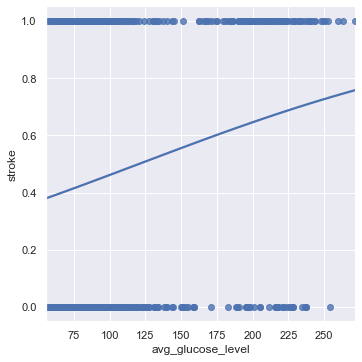

In [34]:
# Replot the simple version
sns.lmplot(data=resampleStroke, x="avg_glucose_level",
           y="stroke", logistic=True, ci=None)


Okay, the model is more balance than previous. Let redo the regression step


In [35]:
# Split train and test dataset to cross validation later
X = resampleStroke[["age", "avg_glucose_level", "bmi"]]
y = resampleStroke["stroke"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
display(pd.Series(predictions).value_counts())
print(classification_report(y_test, predictions))


1    96
0    69
dtype: int64

              precision    recall  f1-score   support

           0       0.74      0.60      0.66        85
           1       0.65      0.78      0.70        80

    accuracy                           0.68       165
   macro avg       0.69      0.69      0.68       165
weighted avg       0.69      0.68      0.68       165



In [36]:
intercept = logmodel.intercept_
coef = logmodel.coef_
coef = coef[0]
display(dict({
    "Intercept": intercept[0],
    "Age": coef[0],
    "Average Glucose Level": coef[1],
    "BMI": coef[2]
}))


{'Intercept': -5.267021470386196,
 'Age': 0.08541648845754805,
 'Average Glucose Level': -0.0018091579136299927,
 'BMI': 0.021002181035455255}

The formula of logistic model is

$$
p(X)=\frac{e^{\beta_0 + \beta_1X}}{1+ e^{\beta_0 + \beta_1X}}
$$

for 1 independent variables. In our case, we got the coefficients for each variables:

- 'Intercept': -5.2670

- 'Age': 0.0854

- 'Average Glucose Level': -0.0018

- 'BMI': 0.0210

Therefore, our logistic model is:

$$
p(X)=\frac{e^{-5.2670 + 0.0854X_1 - 0.0018X_2 + 0.0210X_3}}{1+ e^{-5.2670 + 0.0854X_1 - 0.0018X_2 + 0.0210X_3}}
$$

The $p(X)$ product a probability point, if if pass a certain threshold (in this case is 0.5), it will be classified as 1 (means that, have stroke), otherwise, they won't have the stroke. We can change this function into linear-like formula for easier interpret:

$$
logit(X) = -5.2670 + 0.0854X_1 - 0.0018X_2 + 0.0210X_3 = -5.2670 + 0.0854*age - 0.0018*agl + 0.0210*bmi
$$

With $logit(X) = ln(\frac{p}{1-p})$

Interpretation of the coefficients:

- `Age`: $0.0854$. If the age is increase by 1, the logit increase by 0.0854. Therefore, the $\frac{p}{1-p} = e^{0.0854} = 1.09$. $\frac{p}{1-p}$ actually means a lot. As $p$ is the this probability for stroke, and $(1-p)$ is the opposite, therefore, $\frac{p}{1-p}$ is the ratio of `true` and `false`. Increase in age for 1 year make the odd of having stroke increase by 9%

- `Average Glucose Level`: $-0.0018$. The same as Age, we can see that increase in glucose level make the odd of having stroke decrease by 1 - 0.998 = 0.002. This number is not considerable, so I think is that, the `Average Glucose Level` is not affect the stroke.

- `BMI`: $0.0210$. If the BMI increase by 1, the odd of having stroke is increase by 2%

Let take a look at plots of the classification and compare with the ground-true data to see the performance.


In [37]:
testDf = X_test[["age", "avg_glucose_level", "bmi"]]
testDf["stroke"] = y_test
predDf = X_test[["age", "avg_glucose_level", "bmi"]]
predDf["stroke"] = predictions
testDf


,age,avg_glucose_level,bmi,stroke
id,,,,
1836,51.0,88.20,28.4,1
44142,25.0,95.01,28.0,0
30989,65.0,220.52,37.2,0
14481,79.0,80.57,23.8,0
45795,74.0,158.90,32.4,0
...,...,...,...,...
19824,76.0,243.58,33.6,1
3370,54.0,81.26,26.5,0
45658,14.0,84.41,33.9,0


<AxesSubplot:xlabel='bmi', ylabel='avg_glucose_level'>

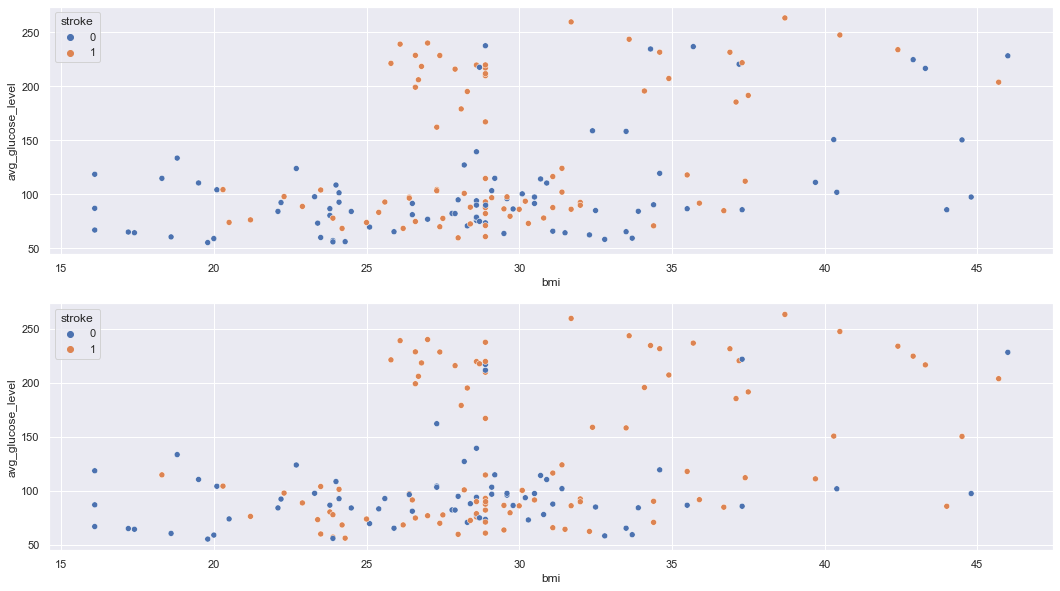

In [38]:
f, (ax1, ax2) = plt.subplots(2)
sns.scatterplot(data=testDf, x="bmi",
                y="avg_glucose_level", ax=ax1, hue="stroke")
sns.scatterplot(data=predDf, x="bmi",
                y="avg_glucose_level", ax=ax2, hue="stroke")


The plot above is an scatter plot between `BMI` and `Avg_glucose_level`, group by the `stroke`, the lower figure is built from the prediction data, while the higher is built from the ground truth. Not having much to say, the classifier accuracy is quite good. There are many mistakes that is easy to spot, but I have to said that the classification run quite well in this case.


<AxesSubplot:xlabel='bmi', ylabel='age'>

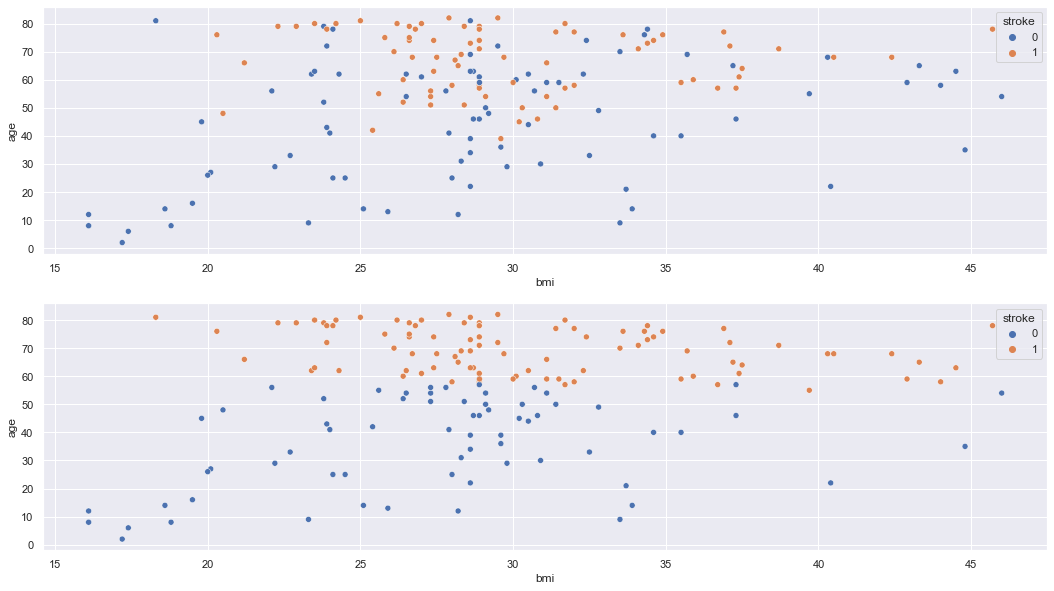

In [39]:
f, (ax1, ax2) = plt.subplots(2)
sns.scatterplot(data=testDf, x="bmi", y="age", ax=ax1, hue="stroke")
sns.scatterplot(data=predDf, x="bmi", y="age", ax=ax2, hue="stroke")


However, this plot is more interesting. This is also a scatter plot between `BMI` and `Age`, group by `stroke`, the higher is the ground truth and the lower is the prediction. We can clearly see that the logistic model predicts that anyone above ~53 year old will have stroke. The ground truth show that, it's true that the older is more likely to have stroke, but not that extreme, as there are many people above 50 don't have stroke.

Another interesting is that, `BMI` does not really affect the `stroke` status. But we have to aware that, the higher the BMI, the elder the people, make they are more likely to be catch by the "anyone above ~53 year old will have stroke" statement.


<AxesSubplot:xlabel='avg_glucose_level', ylabel='age'>

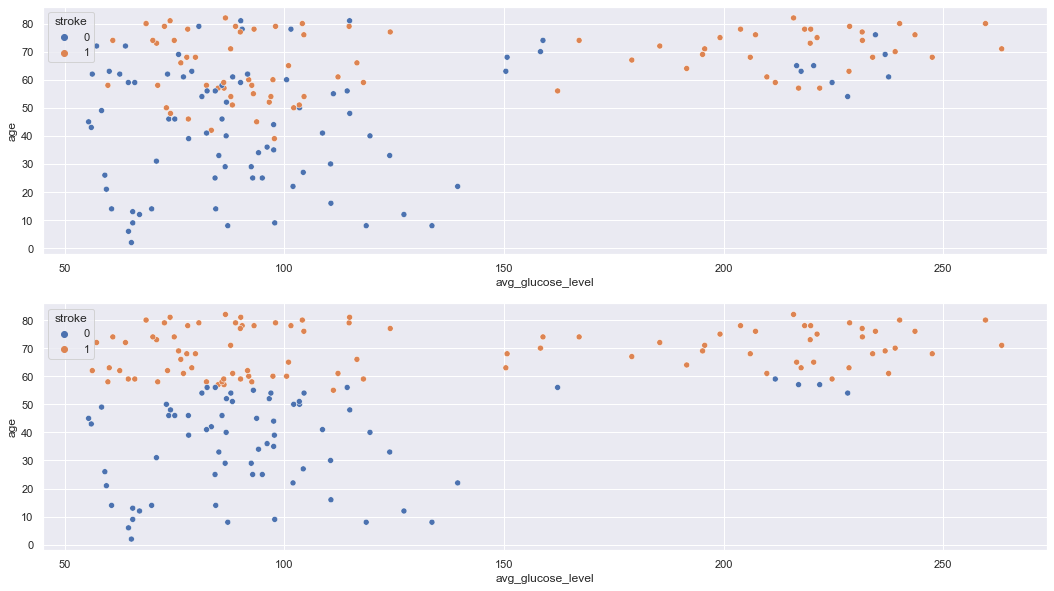

In [40]:
f, (ax1, ax2) = plt.subplots(2)
sns.scatterplot(data=testDf, x="avg_glucose_level",
                y="age", ax=ax1, hue="stroke")
sns.scatterplot(data=predDf, x="avg_glucose_level",
                y="age", ax=ax2, hue="stroke")


Another example to prove that `avg_glucose_level` does not have any effect on the stroke status. The stroke completely predicted by the high age.


In conclusion, we can see that, the age is affect directly to the odd of having stroke, the BMI is not affect so much and the avg_glucose_level not affect anything and may lower that probability.